In [34]:
import pickle
import pandas as pd
import numpy as np
from mesh_import import mesh
from tqdm.autonotebook import tqdm

In [3]:
asbc_dir = mesh.get_data_dir()/"asbc"

In [4]:
with (asbc_dir/"asbc5_characters.pkl").open("rb") as fin:
    chfreq = pickle.load(fin)
with (asbc_dir/"asbc5_words.pkl").open("rb") as fin:
    wdfreq = pickle.load(fin)

In [5]:
affix_dir = mesh.get_data_dir() / "affix"
ckip_affix = mesh.affix.CkipAffixes(affix_dir)

In [13]:
from collections import Counter
from itertools import chain

first_ch = {}
last_ch = {}

for wd, wfreq in wdfreq.items():
    if len(wd) < 2: continue
    first_ch[wd[0]] = first_ch.get(wd[0], 0) + wfreq
    last_ch[wd[-1]] = last_ch.get(wd[-1], 0) + wfreq

In [35]:
data = []
for ch, cfreq in chfreq.items():
    ch_aswd_freq = wdfreq.get(ch, 0)
    lexicalized = ch_aswd_freq/cfreq
    prefix_prod = (first_ch.get(ch, 0))/cfreq
    suffix_prod = (last_ch.get(ch, 0))/cfreq
    data.append((ch, cfreq, lexicalized, prefix_prod, suffix_prod))
affix_data = pd.DataFrame.from_records(data, 
                                       columns=("character", "ch_freq", 
                                                "lexicalized", "prefix_prod", "suffix_prod"))

In [36]:
for row_idx in tqdm(affix_data.index):
    res = ckip_affix.query(affix_data.loc[row_idx, "character"])
    is_prefix = any(x.affix_type=="prefix" for x in res)
    is_suffix = any(x.affix_type=="suffix" for x in res)
    affix_data.loc[row_idx, "is_prefix"] = is_prefix
    affix_data.loc[row_idx, "is_suffix"] = is_suffix

In [37]:
affix_data.head()

,character,ch_freq,lexicalized,prefix_prod,suffix_prod,is_prefix,is_suffix
0,時,67941,0.284055,0.338544,0.337572,True,True
1,間,28909,0.156941,0.021274,0.799682,True,True
2,三,34728,0.365814,0.346550,0.152010,True,True
3,月,21016,0.221641,0.094357,0.623097,True,True
4,十,46416,0.072410,0.360716,0.164922,True,False


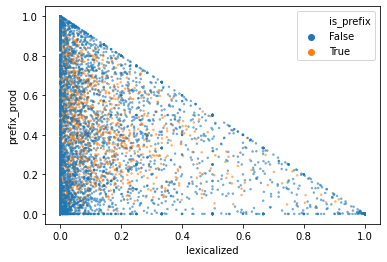

In [42]:
import seaborn as sns
sns.scatterplot("lexicalized", "prefix_prod", data=affix_data, hue="is_prefix", edgecolor=None, s=3, alpha=0.5)

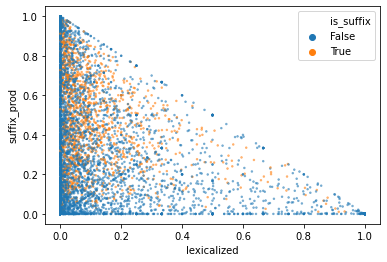

In [41]:
import seaborn as sns
sns.scatterplot("lexicalized", "suffix_prod", data=affix_data, hue="is_suffix", edgecolor=None, s=3, alpha=0.5)